<h1 align="center"><font size="6">Predict the Severity of an Accident</font></h1>

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In this project, we will be working on a case study which is to predict the severity of an accident. Say you are driving to another city for work or to visit some friends. It is rainy and windy, and on the way, you come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. As you keep driving, police car start appearing from afar shutting down the highway. Oh, it is an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital. They must be in critical condition for all of this to be happening. Now, wouldn't it be great if there is something in place that could warn you, given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to. 

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
pip install  imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

## Data 

Let's use data for Seattle city as an example of how to deal with the accidents data. The same can be applied to any data set that you might use for this capstone. 

In [3]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The first column is the labeled data. The remaining columns have different types of attributes. Some or all can be used to train the model. You can also find that most of the observations are good to train and test the machine learning model. The label for the data set is severity, which describes the fatality of an accident. 
You will notice that the shared data has unbalanced labels. You should balance the data, otherwise, you will create a biased ML model. The following is a list of attributes or features that you can use: 
Location, Road condition, Weather condition, Junction junction, Car Speeding, number of people involed, Light conditions and number of vehicles involved in.
For good description of each attribute, you can refer to: : [ArcGIS Metadata Form](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)

In [4]:
df.shape

(194673, 38)

In [5]:
df.iloc[:,:19].head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0


In [6]:
df.iloc[:,19:].head()

,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Methodology <a name="methodology"></a>

In [7]:
df.iloc[:,:19].describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,191996,84811,5638,194673.000000,194673,189769,194673.000000,194673.000000,194673.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,24102,2,1,NaN,2,10,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",NaN,Property Damage Only Collision,Parked Car,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,276,79173,5638,NaN,136485,47987,NaN,NaN,NaN
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,NaN,NaN,NaN,1.298901,NaN,NaN,2.444427,0.037139,0.028391
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,NaN,NaN,NaN,0.457778,NaN,NaN,1.345929,0.198150,0.167413
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,0.000000,0.000000


In [8]:
df.iloc[:,19:].describe(include='all')

,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,194673,194673,188344,194673.000000,194673,29805,189789,189592,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,5985,162058,7,NaN,39,1,4,11,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,96,96,89800,NaN,85209,29805,100274,111135,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.920780,NaN,NaN,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.631047,NaN,NaN,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,2.000000,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,2.000000,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [9]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [10]:
#dataset information and dytpedf.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

# Data visualization and pre-processing
Let’s see how many of each severity is in our data set 

### Displaying Dependent Variable
The dependent variable is going to be the SEVERITYCODE feature. It is an object type with 2 codes that associates with accident severity. We'll call this code as class or label. 

In [11]:
df.groupby(['SEVERITYCODE'])['SEVERITYDESC'].value_counts()

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    136485
2             Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [12]:
df['SEVERITYCODE.1'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

### Displaying Dependent Variable
The dependent variable is going to be the SEVERITYCODE feature. It is an object type with 2 codes that associates with accident severity. We'll call this code as class or label.

<AxesSubplot:>

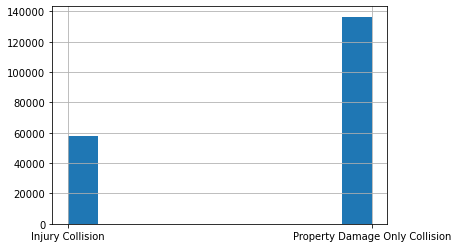

In [13]:
df['SEVERITYDESC'].hist()

From the above plot, we clearly see the dataset is highly imbalance. The Injury Collision cases is lower than Property Damage Only Collision cases.

### Percent of missing values in each column

In [14]:
pd.DataFrame(100*df.isnull().sum(axis=0)/df.shape[0], columns=['percent']).sort_values(by =['percent'],ascending=False)

,percent
PEDROWNOTGRNT,97.602646
EXCEPTRSNDESC,97.103861
SPEEDING,95.205807
INATTENTIONIND,84.689710
INTKEY,66.574718
EXCEPTRSNCODE,56.434123
SDOTCOLNUM,40.959455
JUNCTIONTYPE,3.251093
X,2.739979
Y,2.739979


Not all attributes is good candidate for independent variables. Non relevant attributes such as **OBJECTID** will be removed as well attributes with high percentage of missing data above 25% such as **SPEEDING, PEDROWNOTGRNT**.
***

### Correlation

In [15]:
df_cor=df.corr()
df_cor.sort_values(by=['SEVERITYCODE'], ascending=False)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326
PEDCYLCOUNT,0.214218,-0.001752,0.026304,0.034432,0.031342,0.031296,0.000531,0.214218,-0.038809,-0.016920,1.000000,-0.253773,0.382521,0.034593,0.453657,0.109820
SDOT_COLCODE,0.188905,0.010904,-0.019694,-0.037094,-0.027617,-0.027461,0.007114,0.188905,-0.128960,0.260393,0.382521,-0.365814,1.000000,-0.041084,0.206835,0.189518
CROSSWALKKEY,0.175093,0.013586,0.009508,0.056046,0.048179,0.048063,0.018420,0.175093,-0.032258,0.565326,0.109820,-0.200526,0.189518,0.086228,-0.003422,1.000000
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
SEGLANEKEY,0.104276,-0.001618,0.004618,0.028076,0.019701,0.019586,-0.010510,0.104276,-0.021383,0.001810,0.453657,-0.122941,0.206835,0.066449,1.000000,-0.003422
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179


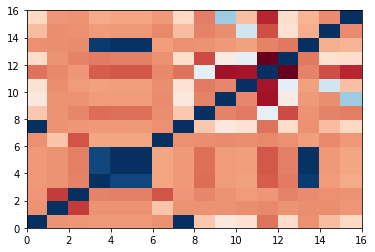

In [16]:
plt.pcolor(df_cor, cmap='RdBu')

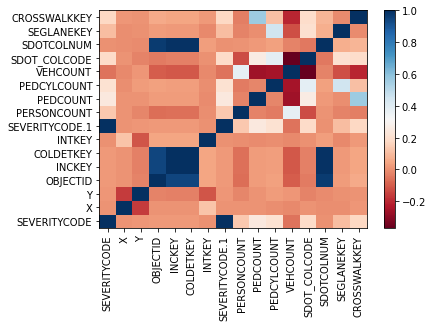

In [17]:
fig, ax = plt.subplots()
im = ax.pcolor(df_cor, cmap='RdBu')

#label names
row_labels = df_cor.columns#.levels[1]
col_labels = df_cor.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_cor.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_cor.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [18]:
cor_big=df[["OBJECTID","INCKEY","COLDETKEY","SDOTCOLNUM"]]
cor_big.head()

,OBJECTID,INCKEY,COLDETKEY,SDOTCOLNUM
0,1,1307,1307,NaN
1,2,52200,52200,6354039.0
2,3,26700,26700,4323031.0
3,4,1144,1144,NaN
4,5,17700,17700,4028032.0


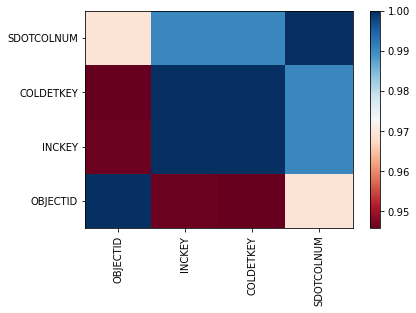

In [19]:
fig, ax = plt.subplots()
im = ax.pcolor(cor_big.corr(), cmap='RdBu')

#label names
row_labels = cor_big.corr().columns#.levels[1]
col_labels = cor_big.corr().index

#move ticks and labels to the center
ax.set_xticks(np.arange(cor_big.corr().shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(cor_big.corr().shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [20]:
df_dropid=df.drop(cor_big, axis = 1)

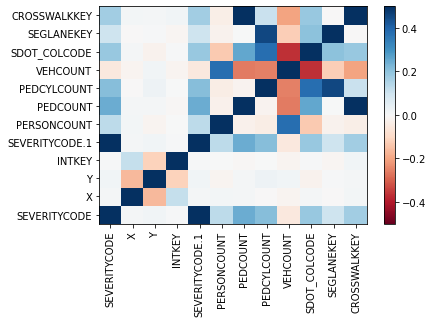

In [21]:
fig, ax = plt.subplots()
im = ax.pcolor(df_dropid.corr(), cmap='RdBu',vmin=-0.5,vmax=0.5)

#label names
row_labels = df_dropid.corr().columns#.levels[1]
col_labels = df_dropid.corr().index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_dropid.corr().shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_dropid.corr().shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## 3. Data Preparation
#### **A. Remove non-relevant and high percentage of missing data.**
Non-relevant features, features that are derived from other features, and features with high missing data will be removed. 

In [22]:
# Non-relevant attributes  and High percentage of missing data
na_rel_attr = ['OBJECTID','COLDETKEY','INCKEY','REPORTNO', 'STATUS', 'INTKEY','EXCEPTRSNCODE', 'EXCEPTRSNDESC',
               'SDOT_COLCODE', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM','SPEEDING','JUNCTIONTYPE',
               'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY','SDOT_COLDESC', 'SEVERITYCODE.1']

In [23]:
# Drop non relevant attributes
df.drop(na_rel_attr, axis=1, inplace=True)

#### **B. Dropping nan data accross the rows**
We've dropped features with high percentage of missing data. However, there are several features left that have few missing data. It spans from 0.98-3.25%. We can either impute these missing data with its mean/mode or drop them out. Since we have a lot of samples, i think it should be ok to drop these nan data.

In [24]:
#dropping samples with nan
df.dropna(axis=0, how='any', inplace=True)

In [25]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0,Raining,Wet,Daylight,N


#### **D. Feature engineering day, month and time and verify its correlation to accident severity.**

In [26]:
# Extract accident date to the name of days
df.loc[:,'DAY'] = pd.to_datetime(df['INCDATE']).dt.day_name().str.slice(stop=3)
# df.loc[:,'MONTH'] = pd.to_datetime(df['INCDATE']).dt.month_name().str.slice(stop=3)
df.loc[:,'MONTH'] = pd.to_datetime(df['INCDATE']).dt.month_name() ############

#### We'll encode the time as follow:
* 6-12pm : morning
* 12-18pm: afternoon
* 18-24pm: evening
* 0-6am: night

In [27]:
pd.to_datetime(df['INCDATE']).dt.day_name().str.slice(stop=3)

0         Wed
1         Wed
2         Thu
3         Fri
4         Wed
         ... 
194668    Mon
194669    Tue
194670    Sat
194671    Tue
194672    Fri
Name: INCDATE, Length: 184146, dtype: object

In [28]:
df.loc[:,'INCDTTM'] = pd.to_datetime(df['INCDTTM']).dt.hour

In [29]:
df.loc[df['INCDTTM'].between(6,12), 'HOUR'] = 'Morning'
df.loc[df['INCDTTM'].between(12,18), 'HOUR'] = 'Afternoon'
df.loc[df['INCDTTM'].between(18,24), 'HOUR'] = 'Evening'
df.loc[df['INCDTTM'].between(0,6), 'HOUR'] = 'Night'

<AxesSubplot:xlabel='MONTH', ylabel='SEVERITYCODE'>

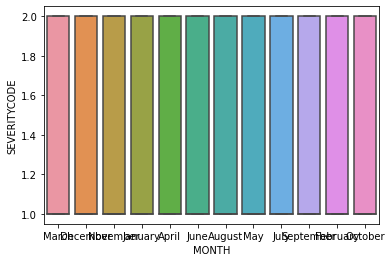

In [30]:
sns.boxplot(x ="MONTH", y="SEVERITYCODE", data = df)

<AxesSubplot:xlabel='MONTH', ylabel='PERSONCOUNT'>

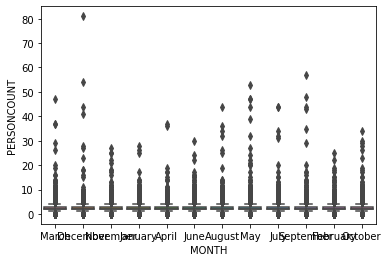

In [31]:
sns.boxplot(x ="MONTH", y="PERSONCOUNT", data = df)

<AxesSubplot:xlabel='MONTH', ylabel='SEVERITYCODE'>

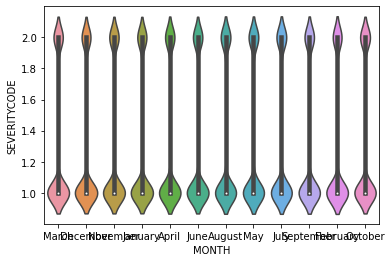

In [32]:
sns.violinplot(x ="MONTH", y="SEVERITYCODE", data = df)

In [33]:
SEVERITYCODE_MONTH=df[['SEVERITYCODE','MONTH']].groupby(['MONTH'],as_index=False).mean()
SEVERITYCODE_MONTH

,MONTH,SEVERITYCODE
0,April,1.303711
1,August,1.316413
2,December,1.283905
3,February,1.289256
4,January,1.291688
5,July,1.319913
6,June,1.302195
7,March,1.299125
8,May,1.315649
9,November,1.299504


<AxesSubplot:xlabel='MONTH', ylabel='SEVERITYCODE'>

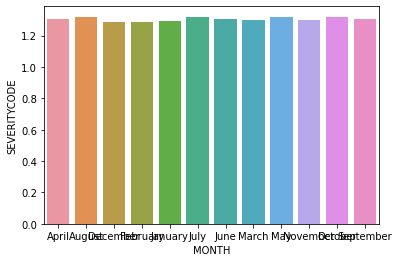

In [34]:
sns.barplot(x="MONTH", y="SEVERITYCODE", data=SEVERITYCODE_MONTH)

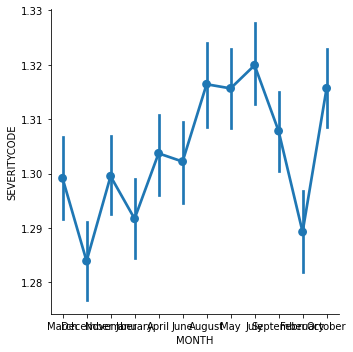

In [35]:
sns.catplot(x="MONTH", y="SEVERITYCODE", kind="point", data=df);

In [36]:
crosstab_SEVERITYCODE_MONTH = pd.crosstab(df['MONTH'], df['SEVERITYCODE']) #列联表（contingency table），
crosstab_SEVERITYCODE_MONTH

SEVERITYCODE,1,2
MONTH,,
April,10546,4600
August,10612,4912
December,10518,4170
February,9374,3815
January,10942,4506
July,10591,4982
June,11033,4778
March,10736,4582
May,10784,4974


<AxesSubplot:xlabel='SEVERITYCODE', ylabel='MONTH'>

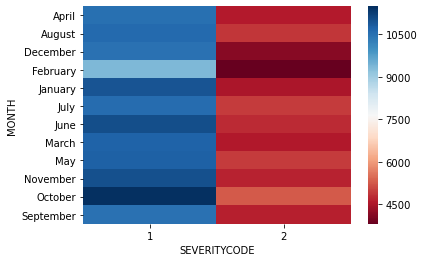

In [37]:
sns.heatmap(crosstab_SEVERITYCODE_MONTH, cmap='RdBu')

In [38]:
from scipy.stats import chi2_contingency
print('Chi-Square={0}\nP value={1}'.format(*chi2_contingency(crosstab_SEVERITYCODE_MONTH)[:2]))

Chi-Square=107.97500315557508
P value=4.645388570774234e-18


The p value is less than 0.05, it can be considered that there is a correlation between the two variables.

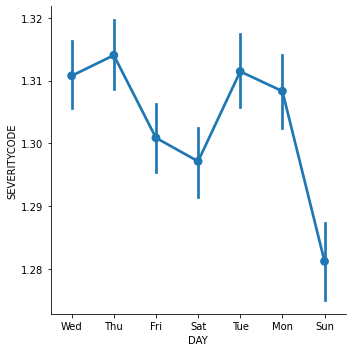

SEVERITYCODE      1     2
DAY                      
Fri           21333  9181
Mon           17201  7667
Sat           18314  7742
Sun           14997  5867
Thu           19015  8705
Tue           18562  8396
Wed           18724  8442


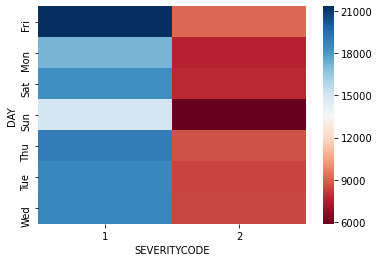

Chi-Square=86.73986389158496
P value=1.438950815318744e-16


In [39]:
plt.show(sns.catplot(x="DAY", y="SEVERITYCODE", kind="point", data=df))
crosstab_SEVERITYCODE_DAY = pd.crosstab(df['DAY'], df['SEVERITYCODE']) #列联表（contingency table），
print(crosstab_SEVERITYCODE_DAY)
plt.show(sns.heatmap(crosstab_SEVERITYCODE_DAY, cmap='RdBu'))
print('Chi-Square={0}\nP value={1}'.format(
 *chi2_contingency(crosstab_SEVERITYCODE_DAY)[:2]))

The p value is less than 0.05, it can be considered that there is a correlation between the two variables.

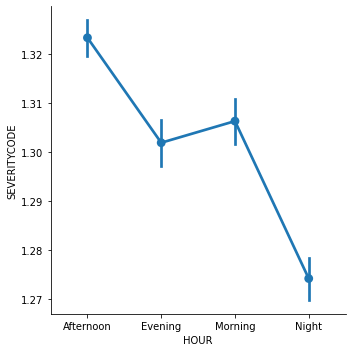

SEVERITYCODE      1      2
HOUR                      
Afternoon     44678  21353
Evening       26328  11389
Morning       26095  11526
Night         31045  11732


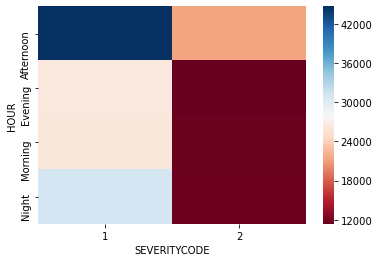

Chi-Square=297.6894929928248
P value=3.146453764424417e-64


In [40]:
plt.show(sns.catplot(x="HOUR", y="SEVERITYCODE", kind="point", data=df))
crosstab_SEVERITYCODE_HOUR = pd.crosstab(df['HOUR'], df['SEVERITYCODE']) #列联表（contingency table），
print(crosstab_SEVERITYCODE_HOUR)
plt.show(sns.heatmap(crosstab_SEVERITYCODE_HOUR, cmap='RdBu'))
print('Chi-Square={0}\nP value={1}'.format(
 *chi2_contingency(crosstab_SEVERITYCODE_HOUR)[:2]))

The p value is less than 0.05, it can be considered that there is a correlation between the two variables.

There is a correlation between day, month and hour of accident happens and its severity. For month feature, July is where highest percentage of accidents happen for Injury Collision. For day feature, Thursday is when highest percentage of Injury Collision accident occurs. Highest percentage fatality Injury Collision accidents occur at Afternoon.

<br>
<br>


#### **E. Verify the others categorical and numerical features.**
***

**Categorical Feature**

In [41]:
def SEVERITYCODE_CORR_CATE(CATE):
    crosstab_SEVERITYCODE_CATE = pd.crosstab(df["SEVERITYCODE"],df[CATE]) #列联表（contingency table），
    print(crosstab_SEVERITYCODE_CATE)
    plt.show(sns.heatmap(crosstab_SEVERITYCODE_CATE, cmap='RdBu'))
    plt.show(sns.catplot(x=CATE, y="SEVERITYCODE", kind="point", data=df))
    print('Chi-Square={0}\nP value={1}'.format(*chi2_contingency(crosstab_SEVERITYCODE_CATE)[:2]))

ADDRTYPE      Block  Intersection
SEVERITYCODE                     
1             92280         35866
2             28737         27263


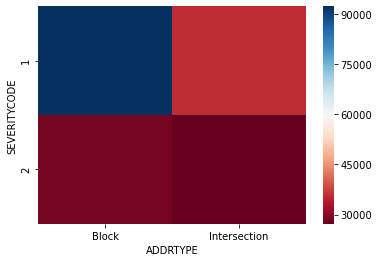

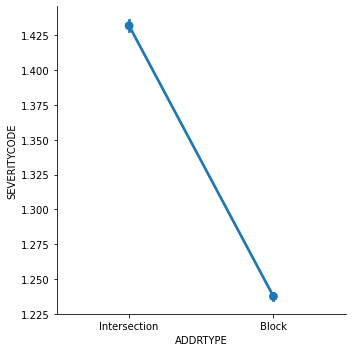

Chi-Square=7407.638278803481
P value=0.0


In [42]:
SEVERITYCODE_CORR_CATE('ADDRTYPE')

ADDRTYPE      Block  Intersection
SEVERITYCODE                     
1             92280         35866
2             28737         27263


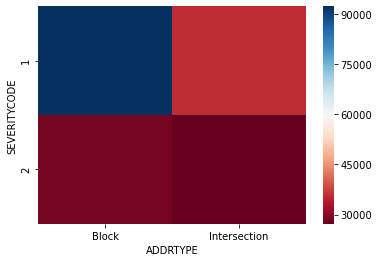

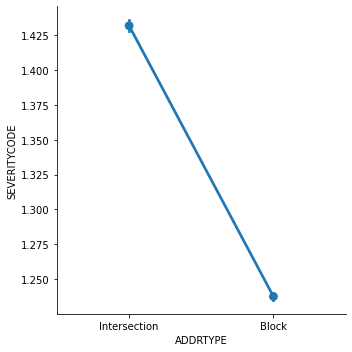

Chi-Square=7407.638278803481
P value=0.0


In [43]:
SEVERITYCODE_CORR_CATE('ADDRTYPE')

COLLISIONTYPE  Angles  Cycles  Head On  Left Turn  Other  Parked Car  \
SEVERITYCODE                                                           
1               20857     664     1132       8231  16417       43575   
2               13550    4702      859       5377   5778        2638   

COLLISIONTYPE  Pedestrian  Rear Ended  Right Turn  Sideswipe  
SEVERITYCODE                                                  
1                     668       18718        2308      15576  
2                    5868       14200         600       2428  


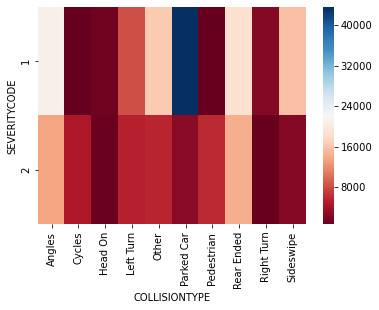

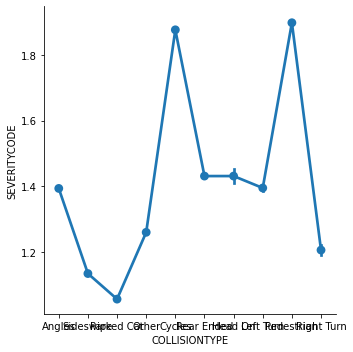

Chi-Square=39794.03391928092
P value=0.0
WEATHER       Blowing Sand/Dirt  Clear  Fog/Smog/Smoke  Other  Overcast  \
SEVERITYCODE                                                              
1                            36  73560             369    655     18500   
2                            13  35267             184    110      8599   

WEATHER       Partly Cloudy  Raining  Severe Crosswind  \
SEVERITYCODE                                             
1                         2    21130                17   
2                         3    10850                 7   

WEATHER       Sleet/Hail/Freezing Rain  Snowing  Unknown  
SEVERITYCODE                                              
1                                   85      722    13070  
2                                   27      166      774  


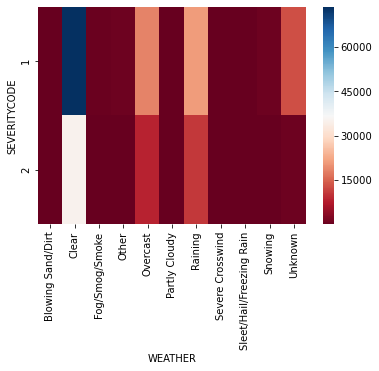

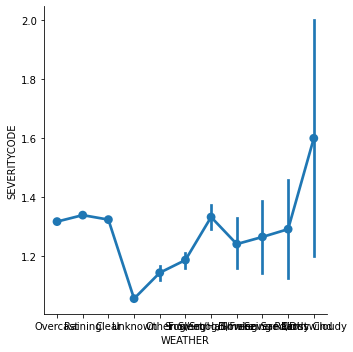

Chi-Square=4601.131871524337
P value=0.0
ROADCOND        Dry  Ice  Oil  Other  Sand/Mud/Dirt  Snow/Slush  \
SEVERITYCODE                                                      
1             82467  908   33     77             41         819   
2             39398  265   20     39             22         165   

ROADCOND      Standing Water  Unknown    Wet  
SEVERITYCODE                                  
1                         76    13080  30645  
2                         26      711  15354  


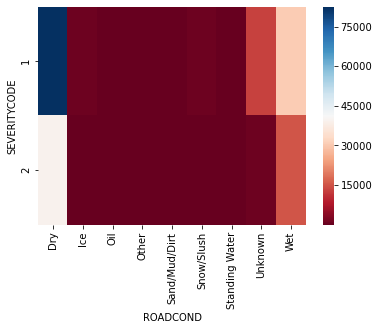

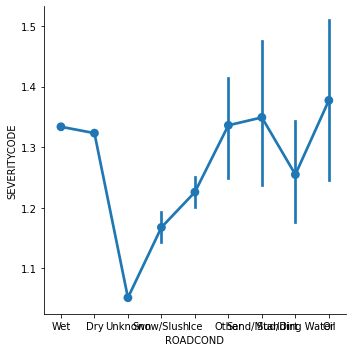

Chi-Square=4684.069421724024
P value=0.0
LIGHTCOND     Dark - No Street Lights  Dark - Street Lights Off  \
SEVERITYCODE                                                      
1                                1130                       839   
2                                 319                       306   

LIGHTCOND     Dark - Street Lights On  Dark - Unknown Lighting  Dawn  \
SEVERITYCODE                                                           
1                               33081                        7  1611   
2                               14166                        4   810   

LIGHTCOND     Daylight  Dusk  Other  Unknown  
SEVERITYCODE                                  
1                75645  3851    151    11831  
2                37864  1911     37      583  


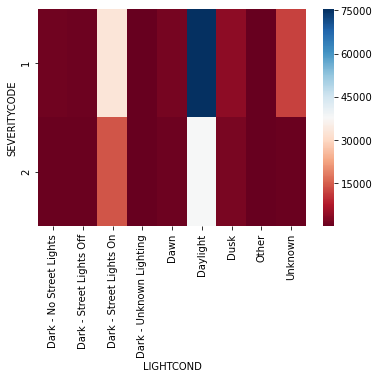

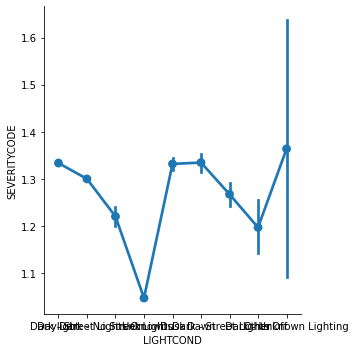

Chi-Square=4446.002504525724
P value=0.0
UNDERINFL         0     1      N     Y
SEVERITYCODE                          
1             55856  2295  66906  3089
2             22208  1584  30318  1890


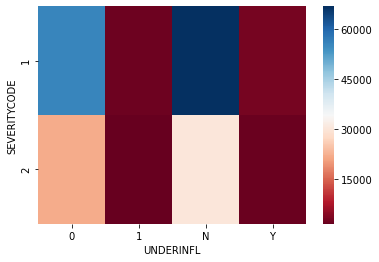

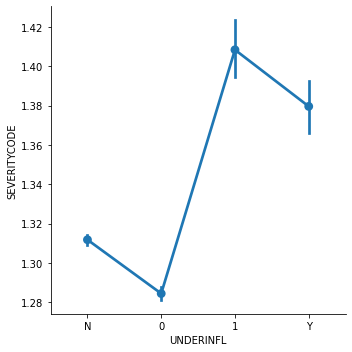

Chi-Square=502.7383359271206
P value=1.2168296713105333e-108
HITPARKEDCAR       N     Y
SEVERITYCODE              
1             121933  6213
2              55585   415


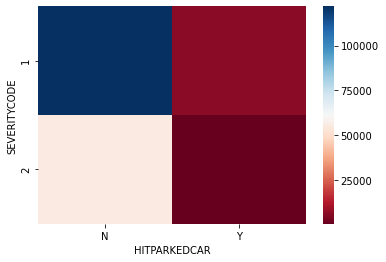

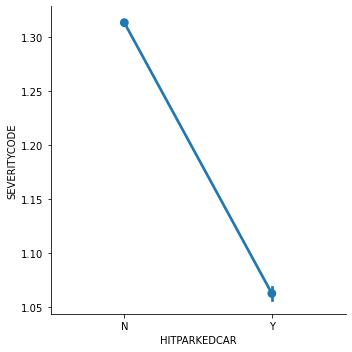

Chi-Square=1893.5332496180267
P value=0.0


In [44]:
for i in ['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'HITPARKEDCAR']:
    SEVERITYCODE_CORR_CATE(i)

Accidents most likely happened in the block.

Parked car type accident is dominant on Property Damage Only Collision.

Most accidents happen on clear day. 

Most accidents happen on dry road conditions.

Most accidents happen in daylight !!

Most accidents is driving under influence.

Few accidents is related to hitting parked car.!

***
**Numerical Features**

array([[<AxesSubplot:title={'center':'SEVERITYCODE'}>,
        <AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>],
       [<AxesSubplot:title={'center':'PERSONCOUNT'}>,
        <AxesSubplot:title={'center':'PEDCOUNT'}>,
        <AxesSubplot:title={'center':'PEDCYLCOUNT'}>],
       [<AxesSubplot:title={'center':'VEHCOUNT'}>,
        <AxesSubplot:title={'center':'INCDTTM'}>, <AxesSubplot:>]],
      dtype=object)

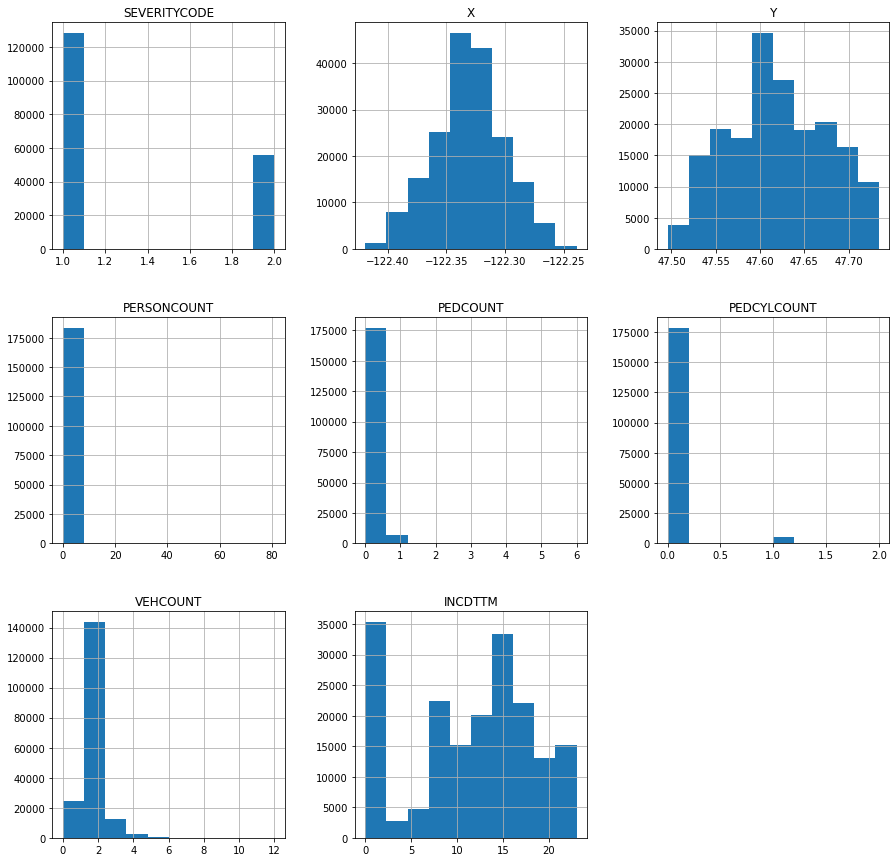

In [45]:
df.hist(figsize = (15,15))

<AxesSubplot:>

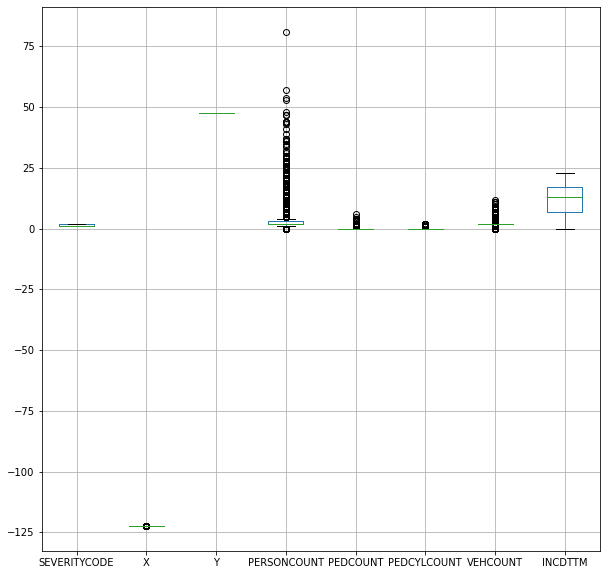

In [46]:
df.boxplot(figsize = (10,10))

***
g = sns.PairGrid(df)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
***

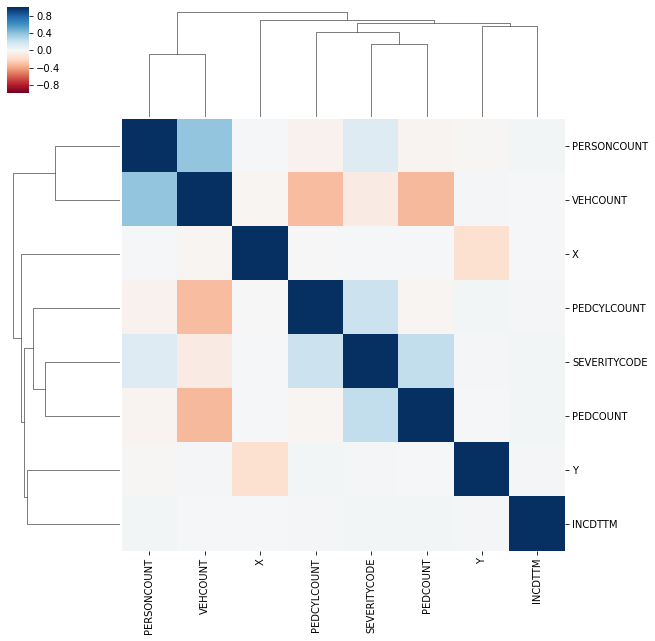

In [47]:
sns.clustermap(df.corr(), cmap='RdBu', vmin=-1)

#### F. Check Lat and Lon Feature
Convert latitude and longitude into cartesian coordinate.

In [48]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [49]:
seattle_map = folium.Map(location=[47.619543, -122.330518], zoom_start=12)
seattle_map

***
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

from folium import plugins

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df.iloc[0:10000, :].Y, df.iloc[0:10000, :].X, df.iloc[0:10000, :].SEVERITYDESC):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
seattle_map
***

It is quite difficult to distinguish SEVERITYDESC.

In [50]:
#Drop X, Y, LOCATION, and SEVERITYDESC attributes
df.drop(['X','Y', 'SEVERITYDESC','LOCATION',], axis=1, inplace=True)
#Drop INCDATE and INCDTTM attributes
df.drop(['INCDATE', 'INCDTTM'], axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184146 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   184146 non-null  int64 
 1   ADDRTYPE       184146 non-null  object
 2   COLLISIONTYPE  184146 non-null  object
 3   PERSONCOUNT    184146 non-null  int64 
 4   PEDCOUNT       184146 non-null  int64 
 5   PEDCYLCOUNT    184146 non-null  int64 
 6   VEHCOUNT       184146 non-null  int64 
 7   UNDERINFL      184146 non-null  object
 8   WEATHER        184146 non-null  object
 9   ROADCOND       184146 non-null  object
 10  LIGHTCOND      184146 non-null  object
 11  HITPARKEDCAR   184146 non-null  object
 12  DAY            184146 non-null  object
 13  MONTH          184146 non-null  object
 14  HOUR           184146 non-null  object
dtypes: int64(5), object(10)
memory usage: 27.5+ MB


Our dataset now has 14 independent variables before encoding categorical features.

In [52]:
#hot encode categorical features
cat_features =['ADDRTYPE','COLLISIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
               'LIGHTCOND', 'HITPARKEDCAR', 'DAY', 'MONTH', 'HOUR',]

df_encode = pd.get_dummies(df, columns=cat_features)

In [59]:
df_encode.shape

(184146, 75)

## 4. Methodology

Our clean data is ready to fed into machine learning model. But if we look back the data distribution, our dataset is higly imbalance. This will create bias on the machine learning model. Therefore, I'll implement these techniques:


**Baseline Model** with Resampling
  - Undersample using imblearn NearMiss.
  - Oversample using imblearn SMOTE (Synthetic Minority Over-sampling Technique).

  
**Cost Sensitive Model**
  - Applying weighting configuration during training.

<br>

**Random Forest (RF)** and **Logistic Regression (LR)** are the model I will use. RF is a bagging type ensemble classifier that uses many such single trees to make predictions. It provides higher accuracy through cross validation nad it won't allow over-ftting trees in the models.

LR measures the relationship between the target variable and the one or more independent variables (our features), by estimating probabilities using it’s underlying logistic function such as Sigmoid. It's simple and fast algorithm.

In [53]:
#pip install imblearn
#import necessary util, models, and metrics
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline,make_pipeline


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from joblib import dump, load
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, recall_score, f1_score
import itertools

Set X,y

In [54]:
#map our clean dataset to general variable name
y = df_encode.SEVERITYCODE
X = df_encode.drop(['SEVERITYCODE'], axis=1).copy()

Normalize Data

In [55]:
#Scaling independent variables
column_name = ['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']
X[column_name] = StandardScaler().fit_transform(X[column_name])

Train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Resampling

#define basic models
rfnm = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
lrnm = LogisticRegression(solver='lbfgs', max_iter=1000, n_jobs=-1)

#create a undersampled data version and do train and test split
nm = NearMiss(version=2, n_jobs=-1)
X_nm, y_nm = nm.fit_resample(X_train,y_train)

print("Number of Samples: ",Counter(y_nm))

nm_rf_model = rfnm.fit(X_nm, y_nm)
nm_lr_model = lrnm.fit(X_nm, y_nm)

dump(nm_rf_model, 'models/nm_rf_model.joblib')
dump(nm_lr_model, 'models/nm_lr_model.joblib')

#nm_rf_model=load('models/nm_rf_model.joblib')
#nm_lr_model=load( 'models/nm_lr_model.joblib')

In [ ]:
#define basic models
rfsmt = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
lrsmt = LogisticRegression(solver='lbfgs', max_iter=1000, n_jobs=-1)

#create a oversampled data version
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smt, y_smt = oversample.fit_resample(X_train, y_train)
#smt = SMOTENC(categorical_features=[7, 74],random_state=21, n_jobs=-1)
#X_smt, y_smt = smt.fit_resample(X_train,y_train)

print("Number of Samples: ",Counter(y_smt))

smt_rf_model = rfsmt.fit(X_smt, y_smt)
smt_lr_model = lrsmt.fit(X_smt, y_smt)

#dump(smt_rf_model, 'models/smt_rf_model.joblib')
#dump(smt_lr_model, 'models/smt_lr_model.joblib')

#smt_rf_model = load('models/smt_rf_model.joblib')
#smt_lr_model = load('models/smt_lr_model.joblib')

Number of Samples:  Counter({2: 96063, 1: 96063})


In [ ]:
df